In [51]:
from numba import jit, njit, prange
from numpy.random import choice
from numpy import argmin
from random import randint
import matplotlib.pyplot as plt

In [52]:
dim = (20,30)

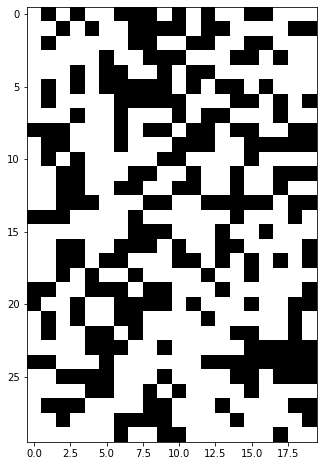

In [59]:
#DISTRIBUZIONE NON UNIFORME
whiteProbability = 0.60

color = [0, 1]
data = [choice(color, dim[0], p=[whiteProbability, 1-whiteProbability]) for j in range(dim[1])]

plt.figure(figsize=(8,8))
plt.imshow(data, cmap="Greys")
plt.show()

In [60]:
def isNeighbour(point1, point2):
    
    """
    This function checks if the points are neighbours (cross pattern)
    """
    
    if abs(point1[0] - point2[0]) + abs(point1[1] - point2[1]) == 1:
        return True
    else:
        return False

In [61]:
%%time

start = (0,0) #Starting Position

queue = list() #List which will contain the possibile pixel values which are connected to the starting position
queue.append(start) #Initialize the queue with the starting element I chose

print("Computing connected region...\nPositions found:")
i = 0
for currentPosition in queue:
    
    for row in range(len(data)):
        for column in range(len(data[row])):

            point = (row, column)

            #I check if the point is a neighbour of the current position, it is not already been put in the list and it has the same value (1 or 0)
            if isNeighbour(point, currentPosition) and (point not in queue) and (data[row][column] == data[currentPosition[0]][currentPosition[1]]):
                i+=1
                print(i, end="\r")
                queue.append(point)
                
print(i)

Computing connected region...
Positions found:
85
CPU times: user 40.1 ms, sys: 5.01 ms, total: 45.2 ms
Wall time: 42.4 ms


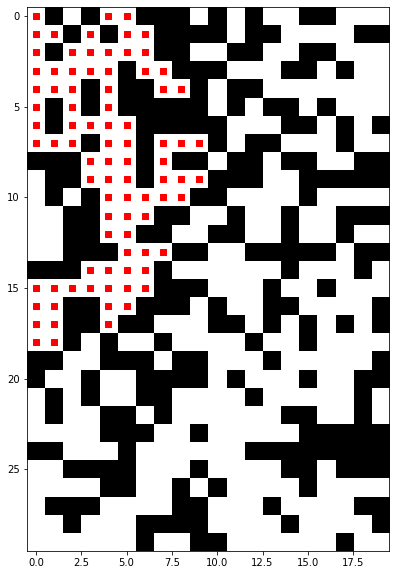

In [62]:
plt.figure(figsize=(10,10))
plt.imshow(data, cmap="Greys")
for element in queue:
    plt.scatter(element[1], element[0], color="red", marker="s")
plt.show()

In [63]:
def findAllPaths(graph, start, end, path=[]):
    
        #I concatenate the various paths I find
        path = path + [start] 
        
        #If start and end coincide, then I already have the path
        if start == end:
            return [path]
        
        #Otherwise I have to compute it
        paths = []
        for node in graph[start]:
            if node not in path:
                newPaths = findAllPaths(graph, node, end, path)
                for newPath in newPaths:
                    paths.append(newPath)
        return paths

In [64]:
def makeGraph(queue):
    graph = dict()
    i = 0
    for point1 in queue:
        i+=1
        print(int(i/len(queue)*100), end=" \r")
        neighbours = list()
        for point2 in queue:
            if isNeighbour(point1, point2):
                neighbours.append(point2)
        graph[point1] = neighbours 
        
    return graph

In [67]:
#I want to go from start (defined above) to end (randomly selected from the queue list) as fast as possible
#As fast as possible means that I want the smallest possible list connecting those points together
#I thus need to make a graph of connected points, like a tree, and not just a single list of all connected points as I did before

#I choose a random ending point in the selected area
end = queue[randint(1,len(queue))] 


# I make the graph
print("Making the graph...")
graph = makeGraph(queue)

    
#I find all the connected paths
print("Finding all connected paths...")
paths = findAllPaths(graph, start=start, end=end)


#I choose the best path 
print("Selecting the best path...")
lenghtOfPaths = list()
i = 0
for element in paths:
    i+=1
    print(int(i/len(paths)*100), end=" \r")
    lenghtOfPaths.append(len(element))   
bestPath = paths[argmin(lenghtOfPaths)]


print("START: ", start)
print("END: ", end)
print("BEST PATH: ", bestPath)

Making the graph:
Finding all connected paths:
Selecting the best path:
START:  (0, 0)
END:  (10, 8)
BEST PATH:  [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 4), (5, 4), (6, 4), (6, 5), (7, 5), (8, 5), (9, 5), (10, 5), (10, 6), (10, 7), (10, 8)]


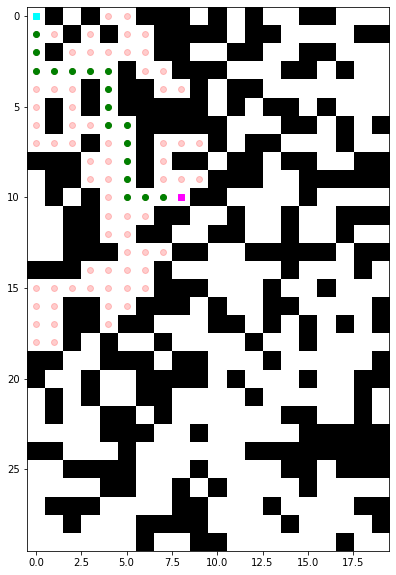

In [85]:
plt.figure(figsize=(10,10))
plt.imshow(data, cmap="Greys")


for element in queue:
    plt.scatter(element[1], element[0], color="red", marker="o", alpha=0.2)  
    
for element in bestPath:
    plt.scatter(element[1], element[0], color="green", marker="o")

    
plt.scatter(start[1], start[0], color="cyan", marker="s")
plt.scatter(end[1], end[0], color="magenta", marker="s")


plt.show()